In [19]:
import json
import BinParser
import uproot
import pickle
import numpy as np
import pandas as pd
import icarusplot
import os

In [20]:
WD = '/Users/jskim/Documents/Neutrino/ICARUS/GUNDAM-1.9.X/work/CovMat'

In [21]:
PlotDir = f'{WD}/plots'
os.system('mkdir -p '+PlotDir)

0

In [22]:
OutDir = f'{WD}/outputs'
os.system('mkdir -p '+OutDir)

0

In [23]:
# ConfigFileName = 'config_G4PipFate.json'
# ConfigFileName = 'config_G4PimFate.json'
# ConfigFileName = 'config_G4ProtonFate.json'


# ConfigFileName = 'config_GENIE_fsi_N_TrueMuonCos.json'
# ConfigFileName = 'config_GENIE_fsi_pi_TrueMuonCos.json'

# ConfigFileName = 'config_GENIE_fsi_N_TrueMuonProtonCos.json'
# ConfigFileName = 'config_GENIE_fsi_pi_TrueMuonProtonCos.json'

# ConfigFileName = 'config_GENIE_fsi_pi_TrueMuonProtonCos_vs_TrueMuonCos.json'
ConfigFileName = 'config_GENIE_fsi_N_TrueMuonProtonCos_vs_TrueMuonCos.json'


# ConfigFileName = 'config_GENIE_fsi_N_TruedeltaPT.json'
# ConfigFileName = 'config_GENIE_fsi_pi_TruedeltaPT.json'

# ConfigFileName = 'config_GENIE_fsi_pi_TruedeltaalphaT.json'
# ConfigFileName = 'config_GENIE_fsi_N_TruedeltaalphaT.json'

# ConfigFileName = 'config_GENIE_fsi_pi_TruedeltaalphaT_vs_TruedeltaPT.json'
# ConfigFileName = 'config_GENIE_fsi_N_TruedeltaalphaT_vs_TruedeltaPT.json'

f_json = open(ConfigFileName)
json_config = json.load(f_json)

In [24]:
json_MainTree = json_config['MainTree']

# Input file
InputFileName = json_MainTree['FilePath']
TreeKey = json_MainTree['TreeKey']
print('- InputFileName: %s'%(InputFileName))
print('- TreeKey: %s'%(TreeKey))

with open(InputFileName, 'rb') as f:
    data_dict = pickle.load(f)

df = data_dict[TreeKey]

# if '/' in TreeKey:

#     with open(InputFileName, 'rb') as f:
#         data_dict = pickle.load(f)

#     del data_dict['TrueDFs']

#     df = data_dict['RecoDFs']['BeamMC']

#     # clean up
#     data_dict_keysList = list(data_dict['RecoDFs'].keys())
#     for key in data_dict_keysList:
#         if key != 'BeamMC':
#             del data_dict['RecoDFs'][key]

# else:

#     with open(InputFileName, 'rb') as f:
#         data_dict = pickle.load(f)

#     df = data_dict[TreeKey]

- InputFileName: /Users/jskim/Documents/Neutrino/ICARUS/GUNDAM-1.9.X/work/CovMat/inputfiles/dfs_MakeFSICovTree.pkl
- TreeKey: df


In [25]:
# Cut and Sample selection

SelectionCutExpr = json_config['SelectionCutExpr']
SampleSelectionExpr = json_config['SampleSelectionExpr']
SampleWeightExpr = json_config['SampleWeightExpr']
print('- Selection cut: %s'%(SelectionCutExpr))
print('- Sample selection: %s'%(SampleSelectionExpr))
print('- Sample weight: %s'%(SampleWeightExpr))


- Selection cut: CutType>=0
- Sample selection: CutType>=0
- Sample weight: FluxWeightWithG3Chase * SPPCVCorrection


In [26]:
# Evaluate the weight expr
df = df.eval('FinalWeight = %s'%(SampleWeightExpr))

In [27]:
# Binning
BinningFile = json_config['BinningFile']
print('- Binning from %s:'%(BinningFile))
bin_parser = BinParser.BinParser(BinningFile)
NBins = len(bin_parser.CutExprs)
for i_Cut, CutExpr in enumerate(bin_parser.CutExprs):
    print('bin %d: '%(i_Cut), CutExpr)

- Binning from /Users/jskim/Documents/Neutrino/ICARUS/GUNDAM-1.9.X/work/binnings/Make2DBinning/binning_TrueMuonProtonCos_vs_TrueMuonCos.txt:
[BinParser][__init__] Reading binning info from /Users/jskim/Documents/Neutrino/ICARUS/GUNDAM-1.9.X/work/binnings/Make2DBinning/binning_TrueMuonProtonCos_vs_TrueMuonCos.txt
Variable name: TrueMuonProtonCos, Type: float
Variable name: TrueMuonCos, Type: float
bin 0:  TrueMuonProtonCos>=-1.0000 & TrueMuonProtonCos<-0.5806 & TrueMuonCos>=-1.0000 & TrueMuonCos<0.1516
bin 1:  TrueMuonProtonCos>=-1.0000 & TrueMuonProtonCos<-0.5806 & TrueMuonCos>=0.1516 & TrueMuonCos<0.5282
bin 2:  TrueMuonProtonCos>=-1.0000 & TrueMuonProtonCos<-0.5806 & TrueMuonCos>=0.5282 & TrueMuonCos<0.7320
bin 3:  TrueMuonProtonCos>=-1.0000 & TrueMuonProtonCos<-0.5806 & TrueMuonCos>=0.7320 & TrueMuonCos<0.8446
bin 4:  TrueMuonProtonCos>=-1.0000 & TrueMuonProtonCos<-0.5806 & TrueMuonCos>=0.8446 & TrueMuonCos<0.9122
bin 5:  TrueMuonProtonCos>=-1.0000 & TrueMuonProtonCos<-0.5806 & True

In [28]:
# Get Nominal histogram
h_Nom = np.zeros(NBins)
for i_Cut, CutExpr in enumerate(bin_parser.CutExprs):
    this_CutExpr = '(%s) & (%s) & (%s)'%(SelectionCutExpr, SampleSelectionExpr, CutExpr)
    this_WeightExpr = 'FinalWeight'

    this_bincontent = np.sum( df.query(this_CutExpr)[this_WeightExpr]  )

    h_Nom[i_Cut] = this_bincontent
print(h_Nom)
    

[28616.68353587  5967.20227773  3820.66765129  3020.10705643
  2813.83645721  2503.32033585  2411.56741056  3175.1301091
 12673.64966814  6331.41205408  3541.48794963  2601.44881962
  2270.70668491  2028.23367667  1960.47633348  2368.92152805
  7311.6172851   7205.87424943  4362.84500569  2876.17506367
  2531.49562971  2107.36960566  2005.66951831  2463.89000653
  4491.86502327  6711.75291106  5280.52493538  3885.30269812
  3113.84328882  2531.89249327  2416.05224861  2660.1165541
  2840.35362458  5034.33843225  5217.14769061  4243.65469864
  3679.98058094  3052.36042025  2762.7729719   2859.44367516
  2115.09727352  4186.64022598  5270.57155693  5019.2649502
  4594.33239612  3962.24206808  3417.82047444  3379.03690163
  1724.19801128  3688.77940026  5069.51485537  5438.70952542
  5484.98917052  4737.92934615  4158.09834668  4197.81823783
  1756.21677439  3533.08913633  5911.57963761  6391.032811
  6789.6520548   6087.21123369  5606.74211211  5881.89242048
  1748.80219799  3251.4029819

In [29]:
JobName = json_config['JobName']
DialName = json_config['DialName']
NUniv = json_config['NUniv']

print('JobName = ', JobName)
print('DialName = ', DialName)
print('NUniv = ', NUniv)

RW_ndarray = np.array(df[DialName].tolist())

h_Univs = np.zeros((NUniv, NBins))

for i_Cut, CutExpr in enumerate(bin_parser.CutExprs):
    this_CutExpr = '(%s) & (%s) & (%s)'%(SelectionCutExpr, SampleSelectionExpr, CutExpr)
    this_WeightExpr = 'FinalWeight'

    df_Selected = df.query(this_CutExpr)
    RW_ndarray = np.array(df_Selected[DialName].tolist())

    for Univ in range(NUniv):
        this_bincontent = np.sum( df_Selected[this_WeightExpr] *  RW_ndarray[:, Univ] )
        h_Univs[Univ][i_Cut] = this_bincontent

    del df_Selected


JobName =  GENIE_fsi_N_TrueMuonProtonCos_vs_TrueMuonCos
DialName =  FSI_N_VariationResponse
NUniv =  100


In [30]:
h_Univs[0]

array([28763.58819954,  5911.88539574,  3746.25740785,  2974.72514201,
        2754.29267719,  2445.88105757,  2384.56634228,  3142.33689915,
       12734.48186861,  6367.05155536,  3522.29586919,  2563.72916078,
        2255.1717509 ,  2008.53506155,  1907.30140671,  2334.60345196,
        7336.07442564,  7291.00976333,  4368.50553597,  2869.32256698,
        2522.74128228,  2063.06092885,  1991.67160944,  2444.45427554,
        4437.42708283,  6781.90834143,  5294.00539277,  3909.15204843,
        3088.93219018,  2538.00105725,  2438.86501057,  2646.67436891,
        2824.45283134,  5110.98784429,  5305.93490789,  4281.56149289,
        3694.73806278,  3102.59395911,  2808.62575889,  2902.55243756,
        2097.50125838,  4185.38696411,  5300.27788475,  5101.52665201,
        4630.3487817 ,  3987.33364205,  3440.47410062,  3388.47053123,
        1704.55070905,  3705.58035354,  5087.59318928,  5530.25106122,
        5556.55177487,  4795.97762246,  4224.30529758,  4224.13150905,
      

In [31]:
h_Mean = np.mean(h_Univs, axis=0)

In [32]:
h_Mean

array([28695.71593342,  5932.74932708,  3784.07879537,  2989.95646761,
        2779.14443339,  2474.4284963 ,  2388.40661613,  3142.29542074,
       12700.9056386 ,  6334.22192521,  3533.01239178,  2584.47358405,
        2255.13218679,  2008.99118221,  1945.27297829,  2351.84328986,
        7319.93783027,  7224.24625924,  4362.46763974,  2869.63432319,
        2521.29866447,  2097.60872136,  1994.81693725,  2450.75555122,
        4485.95862455,  6733.423606  ,  5291.00193048,  3883.8945055 ,
        3112.69167213,  2526.58202571,  2405.97459115,  2648.66760959,
        2827.89803545,  5048.61239741,  5231.89795989,  4253.36520386,
        3680.44777701,  3051.24920994,  2760.82283723,  2853.57518709,
        2101.12793729,  4193.36017443,  5290.54123497,  5032.56627263,
        4605.77786976,  3966.69241585,  3420.91858268,  3374.28080776,
        1709.48497662,  3689.45216933,  5084.54543249,  5451.44129447,
        5498.31788125,  4745.09201744,  4161.6107313 ,  4195.79472475,
      

In [33]:
h_Cov = np.zeros((NBins, NBins))
for i in range(NBins):
    for j in range(NBins):
        h_Cov[i][j] = np.sum((h_Univs[:, i] - h_Mean[i]) * (h_Univs[:, j] - h_Mean[j])) / (NUniv - 1) / h_Mean[i] / h_Mean[j]

h_Corr = np.zeros((NBins, NBins))
for i in range(NBins):
    for j in range(NBins):
        h_Corr[i][j] = h_Cov[i][j] / np.sqrt( h_Cov[i, i] ) / np.sqrt( h_Cov[j, j] )

In [34]:
import ROOT

OutputFileName = json_config['OutputFileName']
f_out = ROOT.TFile(f'{OutDir}/{OutputFileName}', 'RECREATE')

h_Cov_TMat = ROOT.TMatrixDSym(NBins)
for i in range(NBins):
    for j in range(NBins):
        h_Cov_TMat[i][j] = h_Cov[i, j]

h_Corr_TMat = ROOT.TMatrixDSym(NBins)
for i in range(NBins):
    for j in range(NBins):
        h_Corr_TMat[i][j] = h_Corr[i, j]

f_out.mkdir(JobName)
f_out.cd(JobName)
h_Cov_TMat.Write('%s_covariance'%(JobName))
h_Corr_TMat.Write('%s_correlation'%(JobName))
f_out.cd()
f_out.Close()

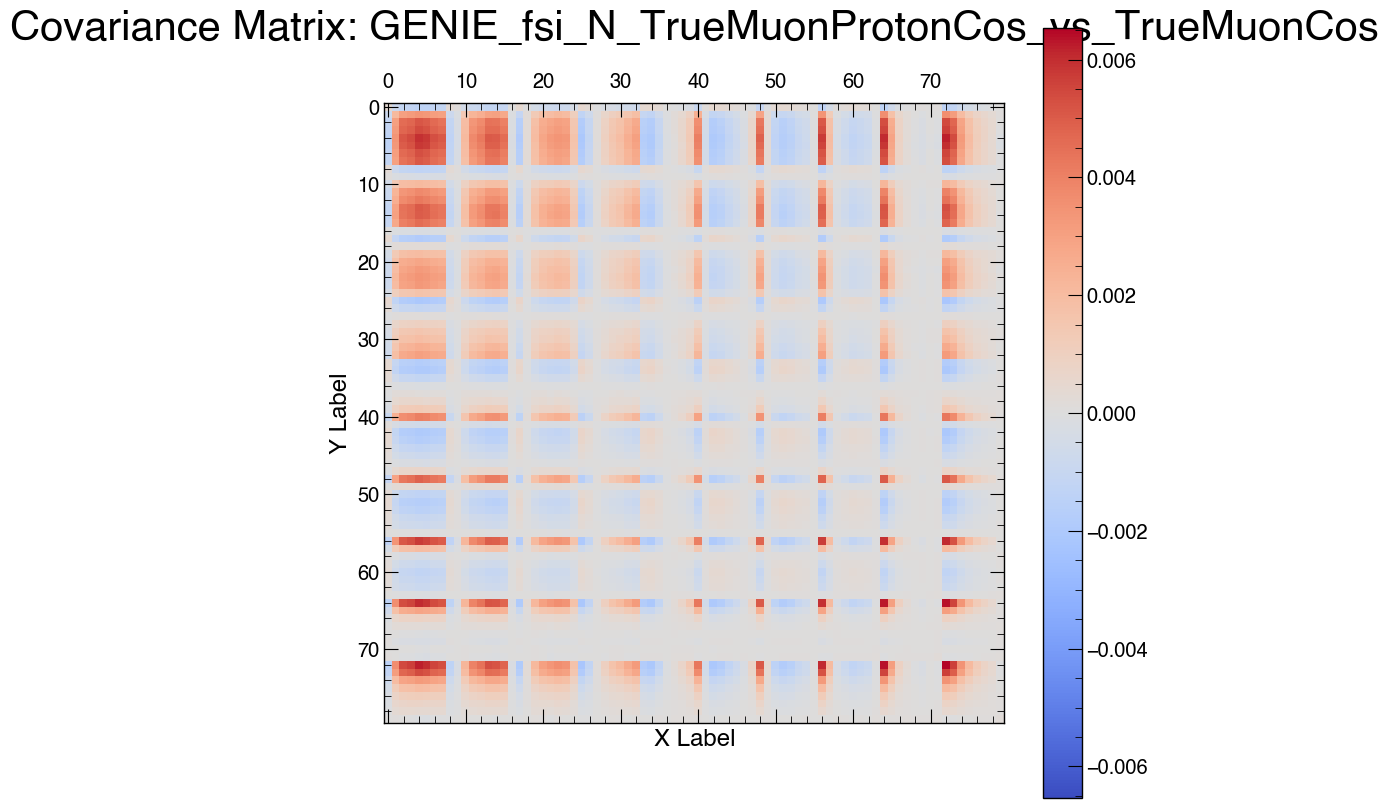

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

# Plot the heatmap
cax = ax.matshow(h_Cov, cmap='coolwarm')

# Add colorbar
plt.colorbar(cax)

cax_lims = cax.get_clim()
cax_max = max( abs(cax_lims[0]), abs(cax_lims[1]) )
cax.set_clim(-1.*cax_max, +1*cax_max)
cax_use_red = 0.75*cax_max

# Add text annotations for each cell
if h_Cov.shape[0]<10:
    for i in range(h_Cov.shape[0]):
        for j in range(h_Cov.shape[1]):
            if h_Cov[i, j]>cax_use_red:
                ax.text(j, i, '%1.1e'%(h_Cov[i, j]), ha='center', va='center', color='white')
            else:
                ax.text(j, i, '%1.1e'%(h_Cov[i, j]), ha='center', va='center', color='k')
# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Covariance Matrix: %s'%(JobName), fontsize=30)

# Show plot
plt.show()

fig.savefig(f'{PlotDir}/CovMat_%s.pdf'%(JobName), bbox_inches='tight')

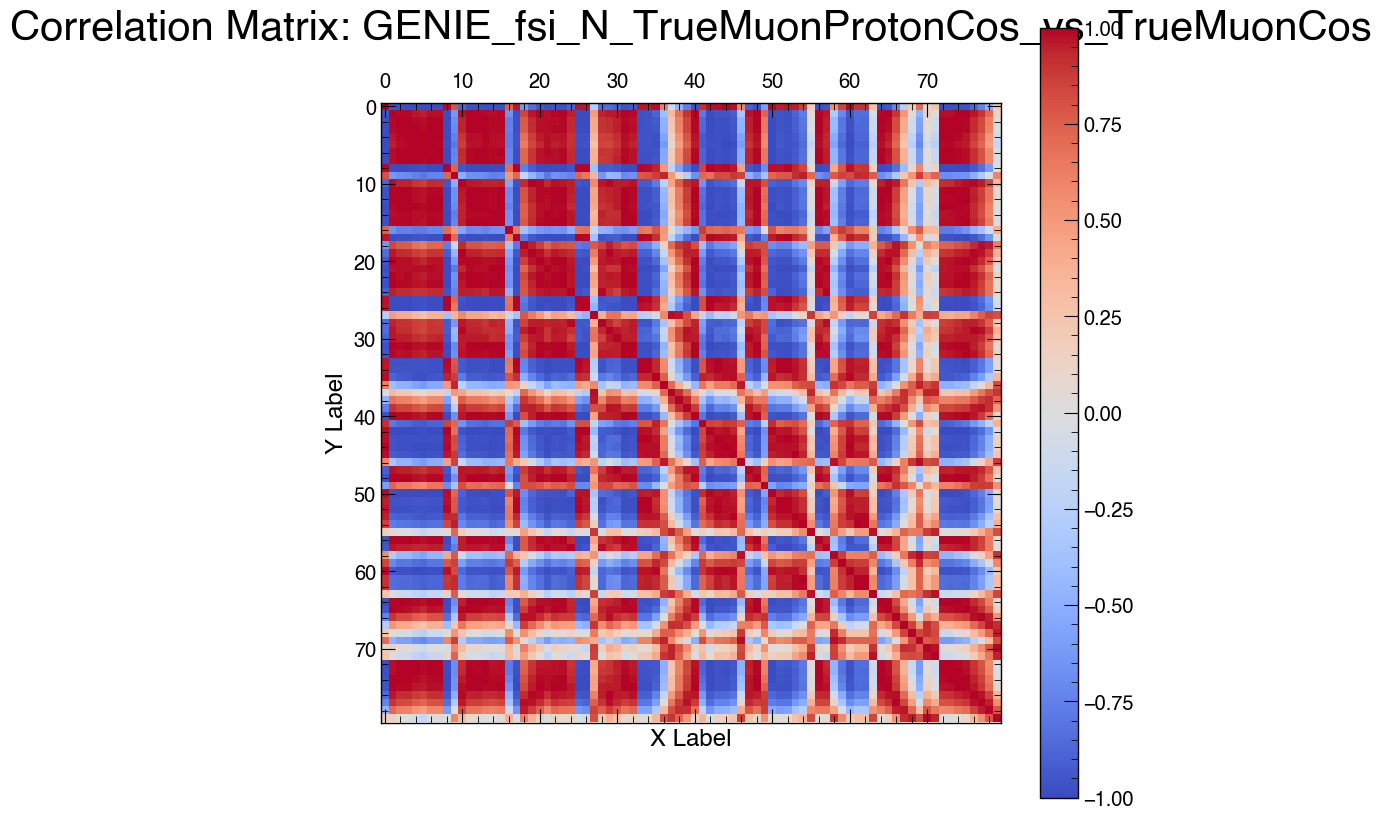

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

# Plot the heatmap
cax = ax.matshow(h_Corr, cmap='coolwarm')

# Add colorbar
plt.colorbar(cax)
cax.set_clim(-1, +1)
cax_use_red = 0.75*cax_max

# Add text annotations for each cell
if h_Corr.shape[0]<10:
    for i in range(h_Corr.shape[0]):
        for j in range(h_Corr.shape[1]):
            if abs(h_Corr[i, j])>cax_use_red:
                ax.text(j, i, '%1.3f'%(h_Corr[i, j]), ha='center', va='center', color='white')
            else:
                ax.text(j, i, '%1.3f'%(h_Corr[i, j]), ha='center', va='center', color='k')
# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Correlation Matrix: %s'%(JobName), fontsize=30)


# Show plot
plt.show()

fig.savefig(f'{PlotDir}/CorrMat_%s.pdf'%(JobName), bbox_inches='tight')
